# YOLOv5 Segmentation


Pull in respective libraries to prepare the notebook environment

In [2]:
# save the working directory path for later use
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [4]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 83.0MB/s]

100%|██████████| 14.9M/14.9M [00:00<00:00, 187MB/s]

100%|██████████| 42.4M/42.4M [00:00<00:00, 175MB/s]

100%|██████████| 91.9M/91.9M [00:00<00:00, 155MB/s]

100%|██████████| 170M/170M [00:02<00:00, 76.2MB/s]



# 4. Train On Custom Data

In [5]:
# Loading Custom Dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EjqdazxdXsdrxchdw66l")
project = rf.workspace("fire-flame-contour-detection").project("fire-flame-contours-detection")
version = project.version(2)
dataset = version.download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fire-Flame-Contours-Detection-2 in yolov5pytorch:: 100%|██████████| 246/246 [00:00<00:00, 8966.24it/s]


In [6]:
%cat {dataset.location}/data.yaml

names:
- fire
nc: 1
roboflow:
  license: CC BY 4.0
  project: fire-flame-contours-detection
  url: https://universe.roboflow.com/fire-flame-contour-detection/fire-flame-contours-detection/dataset/2
  version: 2
  workspace: fire-flame-contour-detection
test: ../test/images
train: Fire-Flame-Contours-Detection-2/train/images
val: Fire-Flame-Contours-Detection-2/valid/images


### Train On Custom Data 


/content/yolov5
2024-04-13 14:55:31.856943: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-13 14:55:31.857005: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-13 14:55:31.858586: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/Fire-Flame-Contours-Detection-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=F

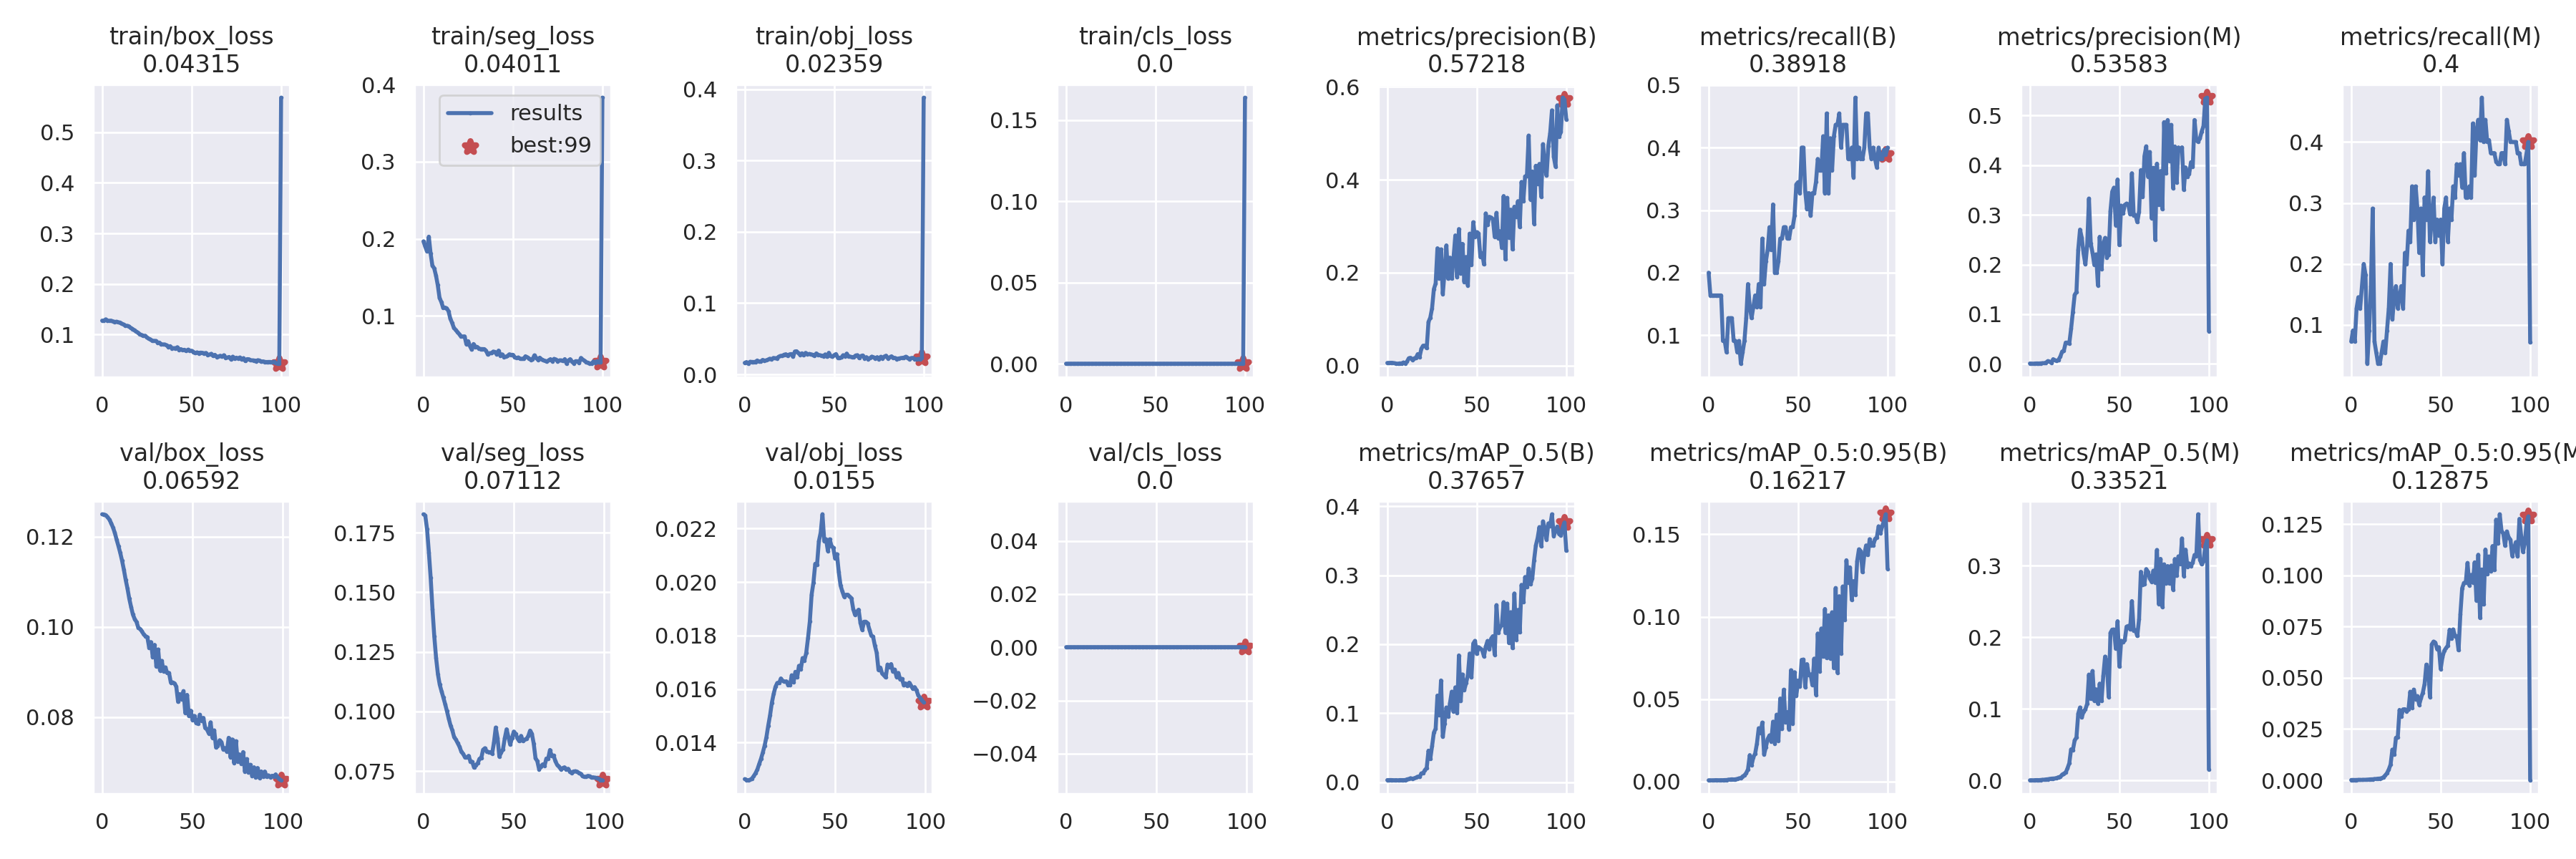

In [7]:
%cd {HOME}/yolov5
!python segment/train.py --img 320 --batch 128 --epochs 100 --data /content/yolov5/Fire-Flame-Contours-Detection-2/data.yaml --weights yolov5s-seg.pt --name custom-dataset
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset/results.png', width=1200)

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

### Validation Custom Model

In [8]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --data /content/yolov5/Fire-Flame-Contours-Detection-2/data.yaml --img 320  --name custom-dataset

/content/yolov5
segment/val: data=/content/yolov5/Fire-Flame-Contours-Detection-2/data.yaml, weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/yolov5/Fire-Flame-Contours-Detection-2/valid/labels.cache... 24 images, 1 backgrounds, 0 corrupt: 100% 24/24 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a dead

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Testing With Your Custom Model

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/Fire-Flame-Contours-Detection-2/test/images/fire031_png.rf.93210f4c3a7269c19fafcbf8180963e3.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-297-gd07d0cf6 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/Fire-Flame-Contours-Detection-2/test/images/fire031_png.rf.93210f4c3a7269c19fafcbf8180963e3.j

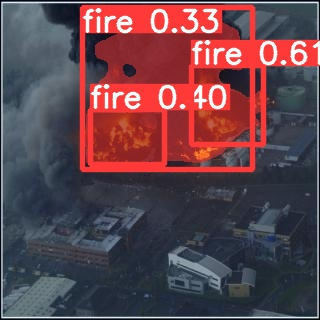

In [9]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset/{example_image_name}", width=600)

In [13]:
!zip -r /content/yolov5_runs.zip /content/yolov5/runs



  adding: content/yolov5/runs/ (stored 0%)
  adding: content/yolov5/runs/predict-seg/ (stored 0%)
  adding: content/yolov5/runs/predict-seg/custom-dataset/ (stored 0%)
  adding: content/yolov5/runs/predict-seg/custom-dataset/fire031_png.rf.93210f4c3a7269c19fafcbf8180963e3.jpg (deflated 2%)
  adding: content/yolov5/runs/val-seg/ (stored 0%)
  adding: content/yolov5/runs/val-seg/custom-dataset/ (stored 0%)
  adding: content/yolov5/runs/val-seg/custom-dataset/val_batch0_pred.jpg (deflated 9%)
  adding: content/yolov5/runs/val-seg/custom-dataset/BoxF1_curve.png (deflated 17%)
  adding: content/yolov5/runs/val-seg/custom-dataset/MaskPR_curve.png (deflated 23%)
  adding: content/yolov5/runs/val-seg/custom-dataset/BoxR_curve.png (deflated 16%)
  adding: content/yolov5/runs/val-seg/custom-dataset/MaskF1_curve.png (deflated 18%)
  adding: content/yolov5/runs/val-seg/custom-dataset/confusion_matrix.png (deflated 40%)
  adding: content/yolov5/runs/val-seg/custom-dataset/val_batch0_labels.jpg (def

In [14]:
from google.colab import files
files.download("/content/.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>